In [6]:
using Pkg
import Pkg; Pkg.add("LaTeXStrings")
using Plots
using LaTeXStrings

    Updating registry at `C:\Users\yalia\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\yalia\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\yalia\.julia\environments\v1.7\Manifest.toml`


# Modelo de Hodgkin-Huxley

\begin{align*}
 C_m \frac{dV}{dt} &= -g_{Na}m^3h(V-E_{Na}) - g_K n^4 (V - E_K) \\
                   &- g_L (V - E_L) + I_{ext} \\
 \frac{1}{\gamma(T)} \frac{dn}{dt} &= \alpha_n(V) (1 - n) - \beta_n(V)n = \frac{n^{\infty}(V) - n}{\tau_n(V)} \\
 \frac{1}{\gamma(T)} \frac{dm}{dt} &= \alpha_m(V) (1 - m) - \beta_m(V)m = \frac{m^{\infty}(V) - m}{\tau_m(V)} \\
 \frac{1}{\gamma(T)} \frac{dh}{dt} &= \alpha_h(V) (1 - h) - \beta_h(V)h = \frac{h^{\infty}(V) - h}{\tau_h(V)} \\
 \tau_n(V) &= \frac{1}{\alpha_n(V) + \beta_n(V)} \\
 n_{\infty}(V) &= \frac{\alpha_n(V)}{\alpha_n(V) + \beta_n(V)}
\end{align*}

Con [Wells]:
* $C_m = 1.0\ \mu\text{F/cm}^2$ la capacitancia de la membrana por unidad de área
* $V$ la diferencia de potencial en la membrana
* $g_{Na} = 120\ \text{mS/cm}^2$ la conductancia máxima por unidad de área para el sodio
* $g_{K} = 36\ \text{mS/cm}^2$ la conductancia máxima por unidad de área para el potasio
* $g_{L} = 0.3\ \text{mS/cm}^2$ la conductancia adicional, independiente del voltaje
* $E_{Na} = 55\ \text{mV}$ el voltaje de la batería en la compuerta de sodio
* $E_{K} = -72\ \text{mV}$ el voltaje de la batería en la compuerta de potasio
* $E_{L} = -49.387\ \text{mV}$ el voltaje filtrado
* $\gamma(T)$ es una constante de proporcionalidad temporal que depende de la temperatura $T$, a $6.3°$C vale $1$ [Cessac2009].

para el caso del calamar.  Los potenciales están medidos considerando que la membrana se encuentra en su potencial de reposo a los $V_r = -60\ \text{mV}$.  Las corrientes $I$ están medidas en $\mu$A/cm$^2$.

Las funciones de transición $\alpha(V)$ y $\beta(V)$, fueron determinadas experimentalmente.  Su forma general es:
\begin{align}
  \alpha(V) \text{ ó } \beta(V) = \frac{A + BV}{C + H e^{\left(\frac{V+D}{F}\right)}}
\end{align}
donde $V$ está medido con respecto al potencial de reposo $V_r$

Los valores medidos por Hodkin y Huxley para la compuerta de **potasio (K)**, fueron:
\begin{align}
  \alpha_n(V) &= \frac{0.01(10 - V)}{e^{\left(\frac{10-V}{10}\right)} - 1} & \beta_n(V) &= 0.125 e^{-\frac{V}{80}}
\end{align}
Observemos que cuando $V = 10$ la función está indefinida.  Utilizando la regla de L'Hopital, se calcula el límite:
\begin{align}
  \alpha_n(10) &= \frac{-0.01}{e^{\left(\frac{10-V}{10}\right)}(-0.1)}
               = \frac{-0.01}{-0.1} = 0.1
\end{align}

 ## Ejercicio
-Programa las función alfa_n como función del voltaje V.

-Necesitarás definir un caso especial cuando V - 10 < epsilon

-Utiliza esta celda para ver como se comporta tu función en esta vecindad y elegir un valor de epsilon adecuado



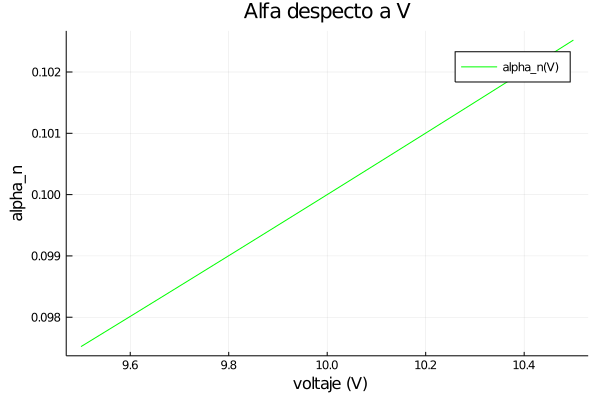

In [8]:

epsilon= 0.000000000000001 #damos este valor a epsilon ya qye la funcion es indefinida V= 9.9999999999999999 a V= 10.000000000000001

function alpha_n(V)
    α_n = (0.01 * (10 - V)) / (ℯ^((10-V) / 10) .- 1)

if abs(V-10) < epsilon    #definimos el caso especial cuando V-10 < epsilon          
        return 0.1                     
    else 
        return α_n
    end 
end


plot(alpha_n, 9.5:0.1:10.5,title= "Alfa despecto a V", color=:lime,

    xlabel=" voltaje (V)", ylabel= "alpha_n", label="alpha_n(V)")

# Ejercicio
-Programa la funciones como función del voltaje V, para la compuerta de K

-Genera luego una gráfica de alfa_n y beta_n

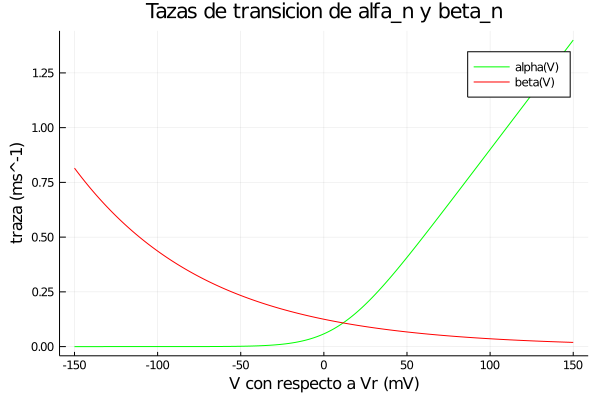

In [15]:
function beta_n(V) 
    β_n = 0.125*ℯ^(-V/80)
    return β_n
end
V = -150:150
α = alpha_n.(V)
β = beta_n.(V)

plot(V, α, title="Tazas de transicion de alfa_n y beta_n", xlabel="V con respecto a Vr (mV)", ylabel="traza (ms^-1)", label="alpha(V)", color=:lime)
plot!(V,β, label="beta(V)", color=:red)

Las funciones para el **sodio (Na)** son:
\begin{align}
  \alpha_m(V) &= \frac{0.1(25 - V)}{e^{\left(\frac{25-V}{10}\right)} - 1} & \beta_m(V) &= 4 e^{-\frac{V}{18}} \\
  \alpha_h(V) &= 0.07 e^{-\frac{V}{20}} & \beta_h(V) &= \frac{1}{e^{\left(\frac{30-V}{10}\right)} + 1}
\end{align}
Para $\alpha_m$ cuando $V = 25$, utilizamos la regla de L'Hopital para calcular el límite:
\begin{align}
  \alpha_m(25) &= \frac{-0.1}{e^{\left(\frac{25-V}{10}\right)}(-0.1)}
               = \frac{-0.1}{-0.1} = 1
\end{align}

# Ejercicio 
Dadas alfa y beta, calcular ahora y graficar n y tau para ambos canales.

Agrega las funciones correspondientes para la compuerta de sodio también,deduce sus firmas a partir de las llamadas en la función para graficar


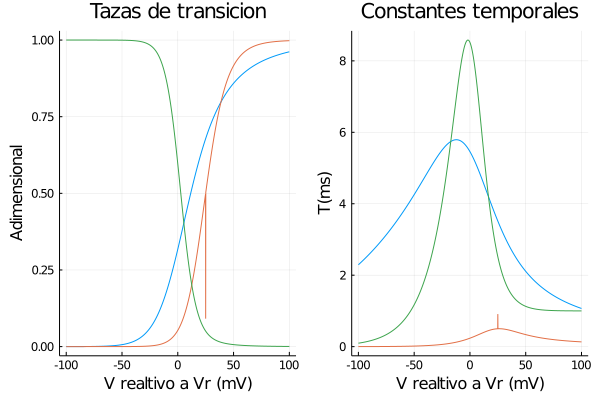

In [43]:
epsilon= 0.000000000000001

function alpha_m(V)
    α_m = (0.1*(25-V))/(ℯ^((25-V)/10)-1)

if abs(V-25) < epsilon  
        return 0.1             
    else 
        return α_m
    end 
end


function beta_m(V)
    β_m = 4*ℯ^-(V/18)
    return β_m
end


function alpha_h(V) 
    α_h = 0.07*ℯ^(-V/20)
    return α_h
end


function beta_h(V) 
    β_h = 1/(ℯ^((30-V)/10)+1)
    return β_h
end



function tau_inf(alpha, beta) # para el canal de potasio y sodio
    τ_∞ = 1 ./(alpha .+ beta)
    return τ_∞
end



function n_inf(alpha, beta)
    n_∞ = alpha ./ (alpha .+ beta)
    return n_∞
end

function plotParameters() 

V = -100:0.1:100
α_n = alpha_n.(V)
β_n = beta_n.(V)

α_m = alpha_m.(V)
β_m = beta_m.(V)

α_h = alpha_h.(V)
β_h = beta_h.(V)


  
n_∞_n = n_inf(α_n, β_n)
τ_∞_n = tau_inf(α_n, β_n)
    
n_∞_m = n_inf(α_m, β_m)
τ_∞_m = tau_inf(α_m, β_m)
    
n_∞_h = n_inf(α_h, β_h)
τ_∞_h = tau_inf(α_h, β_h)

matriz = [n_∞_n n_∞_m n_∞_h]
matriz = [τ_∞_n τ_∞_m τ_∞_h]

    

p1= plot(V, [n_∞_n n_∞_m n_∞_h], title= "Tazas de transicion",label= false, xlabel= "V realtivo a Vr (mV)",
        ylabel= "Adimensional")
p2 = plot(V,[τ_∞_n τ_∞_m τ_∞_h], title= "Constantes temporales" ,label = false, xlabel= "V realtivo a Vr (mV)", 
        ylabel= "T(ms)")
    
plot(p1,p2)
 

end
plotParameters()

![tasas_constantes](figuras/tazas-y-constantes.jpg)

## Simulación con el método numérico de Euler

El método de Euler realiza una aproxima a la función por su tangente.  Dada una ecuación diferencial de la forma:

\begin{align}
  \frac{dy(t)}{dt} = f(y(t))
\end{align}

Partimos de un punto inicial $(t_0, y_0)$ y a partir de él, se calcula el valor de $y$ para el tiempo $t + \Delta t$ iterativamente como:

\begin{align}
  y(t + \Delta t) &= y(t) + \Delta t f(y(t))
\end{align}

El error aproximado por realizar esta aproximación es:
\begin{align}
  E =& \frac{1}{2} \frac{df(t)}{dt}(\Delta t)^2
\end{align}

Aplicando esta fórmula a la ecuación para los canales:

\begin{align}
 \frac{dn}{dt} &= \frac{n^{\infty}(V) - n}{\tau_n(V)}
\end{align}

Obtenemos:

\begin{align}
 n(t + \Delta t) =& n(t) + \Delta t \left[\frac{n^{\infty}(V)}{\tau_n} - \frac{n(t)}{\tau_n(V)} \right] \\
                 =& \left[ 1 - \frac{\Delta t}{\tau_n(V)} \right] n(t) + \frac{\Delta t}{\tau_n(V)}n^{\infty}(V)
\end{align}

Se obtienen fórmulas análogas para $m$ y $h$.  Todas juntas pueden ser escritas en forma matricial:

\begin{align}
  \begin{bmatrix}
  n(t + \Delta t) \\
  m(t + \Delta t) \\
  h(t + \Delta t)
  \end{bmatrix} =& 
  \begin{bmatrix}
  (1 - \Delta t/\tau_n(V)) & 0 & 0 \\
  0 & (1 - \Delta t/\tau_m(V)) & 0 \\
  0 & 0 & (1 - \Delta t/\tau_h(V)) \\
  \end{bmatrix}
  \begin{bmatrix}
  n(t) \\
  m(t) \\
  h(t)
  \end{bmatrix} +
  \begin{bmatrix}
  (\Delta t / \tau_n(V)) n^{\infty}(V) \\
  (\Delta t / \tau_m(V)) m^{\infty}(V) \\
  (\Delta t / \tau_h(V)) h^{\infty}(V)
  \end{bmatrix}
\end{align}

Brevemente:

\begin{align}
  \boldsymbol{\Pi}(t + \Delta t) =& \boldsymbol{A}_\pi \boldsymbol{\Pi}(t) + \boldsymbol{B}_\pi
\end{align}

Se debe realizar el mismo procedimiento con la ecuación diferencial para el voltaje.  Para simplificar la notación, introduzcamos:

\begin{align}
  G_{Na} &= g_{Na}m^3h   &   G_{K} &= g_K n^4
\end{align}

Entonces:
\begin{align}
 C_m \frac{dV}{dt} &= -g_{Na}m^3h(V-E_{Na}) - g_K n^4 (V - E_K) - g_L (V - E_L) + I_{ext} \\
 \frac{dV}{dt} &= -\frac{G_{Na}}{C_m}(V-E_{Na}) - \frac{G_K}{C_m} (V - E_K) - \frac{g_L}{C_m} (V - E_L) + \frac{1}{C_m}I_{ext}
\end{align}

Utilizando el método de Euler:

\begin{align}
 V(t + \Delta t) &= V(t) - \frac{\Delta t}{C_m} \left[ G_{Na}(V-E_{Na}) + G_K (V - E_K) + g_L (V - E_L) + I_{ext}(t) \right] \\
 V(t + \Delta t) &= V(t) - \Delta t \begin{bmatrix} \frac{G_{Na}}{C_m} & \frac{G_K}{C_m} & \frac{g_L}{C_m} \end{bmatrix}  \begin{bmatrix}
                 V(t)-E_{Na} \\
                 V(t)- E_K \\
                 V(t) - E_L
                \end{bmatrix} + \frac{\Delta t}{C_m}I_{ext}(t)
\end{align}

Para los valores por defecto propuestos en la celda siguiente, programar una simulación utilizando el método de Euler produce la figura siguiente:

![simulacion](figuras/Simulacion.png)

# Ejercicio
Devuelve el valor de la corriente aplicada a la membrana, al tiempo t, en microampers.

In [37]:
parametros = Dict(
    "DeltaT" => 0.01,   
    "maxT" => 50.0,        
    "V0" => 0.0,        
    "gNa" => 120.0,     
    "gK" => 36.0,
    "gL" => 0.3,
    "Cm" => 1.0,       
    "ENa" => 115.0,     
    "EK" => -12.0,
    "EL" => 10.613)
t0 = 10.0
tfin = 16.0
current = 6.5


    function Iext(t)
        
        if (t>t0) & (t<tfin)
            return current 
        else
            return 0
        end
end
        
   

Iext (generic function with 1 method)

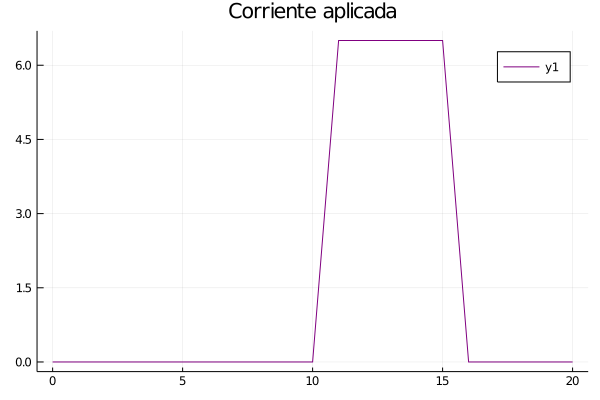

In [42]:
t= 0:20
plot(t, Iext.(t), title= "Corriente aplicada", yaxis= 0:1.5:6.5, color=:purple)

# Ejercicio
-Implementa aquí el algoritmo de intregración numérica de Euler para calcular V(t)

-Asegúrate de que, al ejecutar la simulación con los parámetros por defecto, se reproduce la imagen de arriba.

-Después prueba con pulsos de t en 10->30, con corrientes de 10 y 10 microamperes¿Qué observas?

-Inserta al final una celda con tus comentarios y resultados

In [ ]:
maxT =50.0
V0= 0.0 
DeltaT = 0.01 
Cm= 1.0 
ENa=115.0 
EK=-12.0
EL=10.613
gNa= 120.0 
gK= 36.0 
gL= 0.3


function simulaHodkinHuxley(V0, t0, tfin, current)

n_∞(V) = alpha_n(V)/(alpha_n(V) + beta_n(V))
m_∞(V) = alpha_m(V)/(alpha_m(V) + beta_m(V))
h_∞(V) = alpha_h(V)/(alpha_h(V) + beta_h(V))
    
 
function Iext(t)
    """ Devolver el valor de la corriente aplicada, al tiempo t, en microampers."""
    if (t>t0) & (t<tfin)
        return current 
    else 
        return 0
    end
end

  

function HodkinHuxley(u, p, t)
 
    n,m,h,V = u 
    V_diff = V-V0
    dn = alpha_n(V_diff)*(1-n) - beta_n(V_diff)*n
    dm = alpha_m(V_diff)*(1-m) - beta_m(V_diff)*m
    dh = alpha_h(V_diff)*(1-h) - beta_h(V_diff)*h
    

    G_K= gK * (n ^ 4.0) 
    G_Na= gNa * (m ^ 3.0) * h 
    dV = (Iext(t) + (ENa - V)*G_Na + (EK - V)*G_K + (EL - V)*gL)/Cm 
    
    [dn;dm;dh;dV]
end

u0= [n_∞_n(0); n_∞_m(0); n_∞_h(0); 0] 
tspan = (0.0,50.0) 
prob = ODEProblem(HodkinHuxley, u0, tspan) 
sol = solve(prob, saveat=0.01);


G_K_s = gK * sol[1,:].^4
G_Na_s = gNa * (sol[2,:].^ 3.0) .* sol[3,:]

function con()
plot(sol.t, G_K_s, title="Conductancia de los canales", label="G_K", xaxis="t", yaxis="Conductancia (ms/cm2)")
plot!(sol.t, G_Na_s, label="G_Na")
end


function taus()
    
tau_h(V)=tau_inf(alpha_h(V), beta_h(V))

function tau_h_s()
    vect=zeros(length(sol.t))
    for i in 1:(length(sol.t))
        vect[i]=tau_h(sol[4,:][i])
    end
    return vect
end

tau_m(V)=tau_inf(alpha_m(V), beta_m(V))

function tau_m_s()
    vect=zeros(length(sol.t))
    for i in 1:(length(sol.t))
        vect[i]=tau_m(sol[4,:][i])
    end
    return vect
end

tau_n(V)=tau_inf(alpha_n(V), beta_n(V))

function tau_n_s()
    vect=zeros(length(sol.t))
    for i in 1:(length(sol.t))
        vect[i]=tau_n(sol[4,:][i])
    end
    return vect
end
    plot(sol.t,tau_h_s(), title="Constantes temporales", xaxis="t (ms)", yaxis="tau (ms)", label="tau_h")
plot!(sol.t,tau_m_s(),label="tau_m")
plot!(sol.t,tau_n_s(),label="tau_n")
    
end

#Gráficas

p1 = plot(sol.t, sol[4,:], legend=false, ylabel="Voltaje relativo en la membrana (mV)", xlabel= "t (ms)", title="Voltaje en la membrana")
p2 = con()
p3 = plot(sol.t, sol[1:3,:]', label=["n" "m" "h"], legend=:topright, ylabel="adimensional", xlabel= "t (ms)", title="Tazas de transicion")
p4= taus()
    
l = (2,2)
plot(p1, p2, p3, p4, layout = l, size=(800,600))
    
end

simulaHodkinHuxley(0.0, 10.0, 16.0, 10)


# Comentarios y resultados
Se pudo observar que cuando la corriente aumenta , la despolarizacion de la membrana cambien lo hace,  haciendo que se tenga un voltaje positivo , como consecuencia los canales de sodio "m" y potasio "n" se activan.
Podemos ver que el modelo de  Hudgkin y Huxley nos describe la propagaccion del potencial, el periodo refractario asi como el umbral, tambien se puede ver el comportamiento de los iones de sodio y potasio tanto dentro como fuera de la membtrana asi como las tasas de transiciòn. 
